In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Mobius(A,z):
    return (A[0,0]*z+A[1,0])/(A[0,1]*z+A[1,1])


def get_lambda(w):
    tau = CBF(w.real,w.imag)

    #Using Komori-Sugawa, we compute the position of punctures via Weierstrass pe-function(elliptic_p)
    e1 = CBF(0.5,0).elliptic_p(tau)
    e2 = CBF(tau/2).elliptic_p(tau)
    e3 = CBF((tau+1)/2).elliptic_p(tau)
    #print(e1,e2,e3)
    # this w is called  "elliptic modular function" or "modular lambda function".
    return (e3 - e2)/(e1 - e2)

In [15]:
get_lambda(complex(1J))


([6.875185818020 +/- 4.54e-13], [-6.8751858180204 +/- 6.43e-14], [+/- 9.25e-14] + [+/- 1.36e-20]*I)


[0.5000000000000 +/- 1.31e-14] + [+/- 9.83e-22]*I

In [16]:
get_lambda(complex(1+1J)), CBF(0.5,0).elliptic_p(CBF(0,1.))

([6.875185818020 +/- 4.36e-13], [+/- 1.69e-14] + [+/- 8.37e-15]*I, [-6.875185818020 +/- 4.77e-13] + [+/- 1.06e-13]*I)


([-1.000000000000 +/- 3.51e-14] + [+/- 1.79e-14]*I,
 [6.875185818020 +/- 4.54e-13])

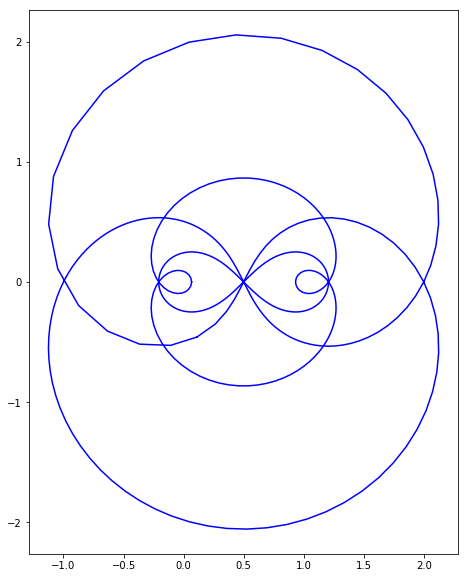

In [3]:
def fd_axis(A, num_pts=200):
    ''''find a fundamental domain for 
    A acting on its axis'''
    
    ta = abs(A.trace())
    if ta < 3:  return "not Anosov"
    
    # not efficient: find the power of A in Gamma(2)
    for k in range(1,4):
        X = A**k
        if (X % 2) == Matrix([[1,0],[0,1]]): break
    
    #this allows one to determine the angle range using trig
    delta = np.arccos(2/np.abs(X.trace())) 
    T = np.linspace(np.pi/2 - delta , np.pi/2 + delta, num_pts)
            
    # Hyperbolic geodesic axis of A connecting roots of Az - z = 0
    center = (A[0,0]- A[1,1])/(A[0,1]*2)
    radius = np.sqrt((A[0,0] - A[1,1])**2 + 4*A[1,0]*A[0,1])/(A[0,1]*2)
    
    
    return radius*np.exp(1J*T) + center

A = Matrix([[2,3],[1,2]])
B = Matrix([[2,1],[1,1]])
C = Matrix([[5,2],[2,1]])

fig, ax  = plt.subplots(1, figsize=(30, 10))
ax.set_aspect('equal')

for X  in  [A,B,C]:

    Z = fd_axis(X)

    TS = [ get_lambda(w) for w in Z[:]]
    W  = np.array([complex(z) for z in TS])
    ax.plot(W.real, W.imag,'b')

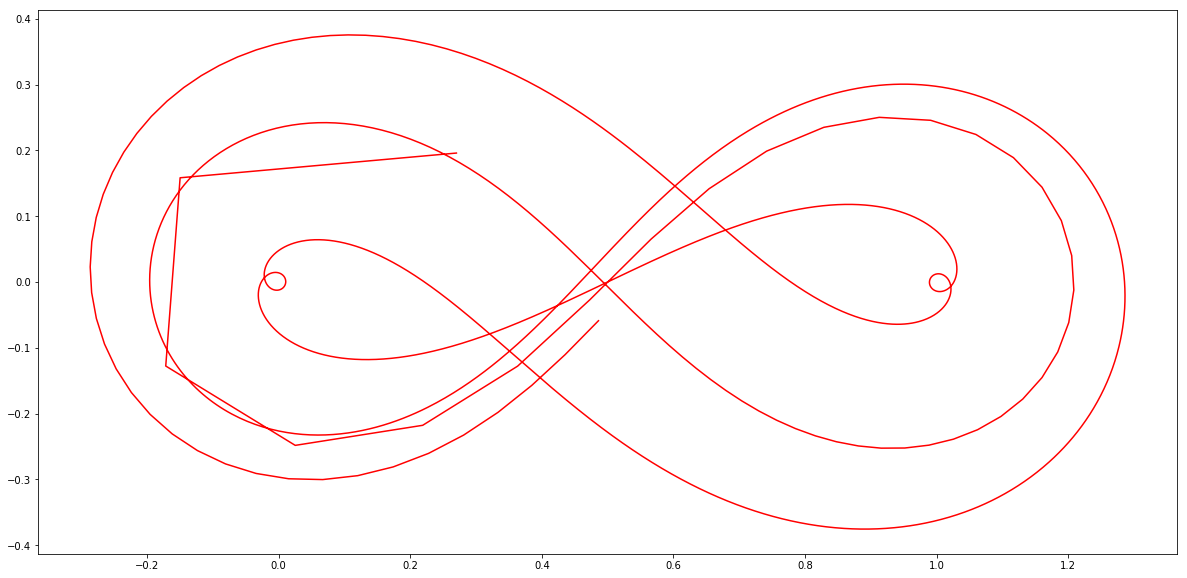

In [8]:
A = Matrix([[1,2],[0,1]])
B = A.T


fig, ax  = plt.subplots(1, figsize=(30, 10))
ax.set_aspect('equal')

cc = 'rb'

for k,X  in  enumerate([A*B*A*B*A*B*A*A*B*B]):

    Z = fd_axis(X,num_pts=10000)

    TS = [ get_lambda(w) for w in Z[:]]
    W  = np.array([complex(z) for z in TS])
    ax.plot(W.real, W.imag,cc[k %2])

In [9]:
A.T

[1 0]
[2 1]

In [29]:
ax.plot(W.real,W.imag);

In [18]:
BB = Matrix([[-2,-1],[-1,-1]])
BB = Matrix([[0,-1],[-1,0]])
for k in range(1,4):
    if BB**k == Matrix([[1,0],[0,1]]):break
        

In [19]:
P = np.array([[1,3],[0,1]])

In [65]:
CBF(.5,0).elliptic_p(CBF(0,1))

[6.875185818020 +/- 4.54e-13]

In [64]:
CBF(.5,0).elliptic_p(CBF(0,1))

[6.875185818020 +/- 4.54e-13]